In [346]:
import sys, os
mainpath = os.path.abspath(os.path.dirname(sys.argv[0]))
sys.path.append(mainpath)

import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle
import math
# import mediapipe as mp
import joblib

In [347]:

heads = {}
i = 0

# folder_path = "AFLW2000-3D/AFLW2000/"
folder_path = os.getcwd()
png_files = glob.glob(os.path.join(folder_path, "*.png"))

# Retrieve .jpg files
jpg_files = glob.glob(os.path.join(folder_path, "*.jpg"))

# Combine both lists
jpg_files = png_files + jpg_files  # Note: Renaming to jpg_files as per your original variable, but consider a more descriptive name like all_image_files

print(f"Found {len(jpg_files)} .png files in {folder_path}")

for image_path in jpg_files:
    image_name = os.path.basename(image_path)

    pickle_name = image_name[0:-7] + "height.pkl"
    
    try:
        with open(pickle_name, 'rb') as file:
            loaded_data = pickle.load(file)
        # print("Loaded data:", loaded_data)
        # print(loaded_data["height_m"].shape)
        # print(type(loaded_data["height_m"]))
    except FileNotFoundError:
        print(f"Error: The file {pickle_name} was not found.")
    except pickle.PicklingError:
        print("Error: Failed to load the pickle file.")

    image = cv2.imread(os.path.join(folder_path, image_name))
    # print("Image:", image_name, "Shape:", image.shape)
    
    sobel_x = cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 1, 0, ksize=3) # Horizontal
    sobel_y =  cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 0, 1, ksize=3) # Vertical
    
    heads[image_name] = {
        "im_rgb": cv2.cvtColor(image, cv2.COLOR_RGB2BGR),
        "im_bgr": image,
        "im_gray": cv2.cvtColor(image, cv2.COLOR_RGB2GRAY),
        "im_height": loaded_data["height_m"],
        "im_gray_gaussian": cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (5, 5), 0),
        "im_sobel_x": sobel_x,  # Horizontal
        "im_sobel_y": sobel_y,  # Vertical
        "im_sobel_mag": cv2.normalize(np.sqrt(sobel_x**2 + sobel_y**2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    }
    
    # output_path = f"{image_name[0:-4]}_head_pose.jpg"  # Save annotated image for each
    print(f"\nProcessing {image_name}...")
    # result = GetHeadPose(image_path, output_path)
    # print("Head Pose Euler Angles:", result['angles'])
    # print("Rotation Matrix (Camera to Head Frame):\n", result['camera_to_head_rotation'])
    i = i + 1
    if i >= 70:
        break
    #       # Wait for a key press indefinitely
   
    

# face_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_frontalface_default.xml'))
# eye_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_eye.xml'))
# mouth_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_mouth.xml'))
# nose_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_nose.xml'))
# profileface_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_profileface.xml'))
# left_ear_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_leftear.xml'))
# right_ear_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_rightear.xml'))


# # Check if classifiers loaded successfully
# classifiers = [face_cascade, eye_cascade, mouth_cascade, nose_cascade, 
#               profileface_cascade, left_ear_cascade, right_ear_cascade]
# if any(c.empty() for c in classifiers):
#     print("Error: One or more cascade classifiers failed to load")


Found 62 .png files in /home/jestin/AMME5710_Major/src/stereo

Processing jestinp_28_rgb.png...

Processing jestin_17_rgb.png...

Processing jestinp_49_rgb.png...

Processing jestin_3_rgb.png...

Processing jestinp_37_rgb.png...

Processing jestin_14_rgb.png...

Processing jestinp_51_rgb.png...

Processing jestinp_21_rgb.png...

Processing jestin_16_rgb.png...

Processing jestinp_45_rgb.png...

Processing jestinp_33_rgb.png...

Processing jestin_4_rgb.png...

Processing jestin_5_rgb.png...

Processing jestinp_22_rgb.png...

Processing jestinp_42_rgb.png...

Processing jestinp_25_rgb.png...

Processing jestin_11_rgb.png...

Processing jestin_7_rgb.png...

Processing jestinp_40_rgb.png...

Processing jestin_13_rgb.png...

Processing jestin_6_rgb.png...

Processing jestinp_26_rgb.png...

Processing jestin_15_rgb.png...

Processing jestinp_41_rgb.png...

Processing jestinp_20_rgb.png...

Processing jestin_10_rgb.png...

Processing jestinp_18_rgb.png...

Processing jestin_8_rgb.png...

Proc

In [348]:
# ------------------------------------------------------------------
# 1. Define where the cascade XML files live
# ------------------------------------------------------------------
# Option A – same folder as this script (recommended if you placed them there)
cascade_dir = os.getcwd()              # e.g. /home/jestin/AMME5710_Major/src/stereo

# Option B – a dedicated sub-folder (uncomment if you prefer)
# cascade_dir = os.path.join(os.path.dirname(__file__), 'cascades')

# ------------------------------------------------------------------
# 2. Helper to load a cascade with a clear error message
# ------------------------------------------------------------------
def load_cascade(name):
    path = os.path.join(cascade_dir, name)
    if not os.path.isfile(path):
        print(f"ERROR: Cascade file not found → {path}")
        return cv2.CascadeClassifier()      # returns an empty classifier
    clf = cv2.CascadeClassifier(path)
    if clf.empty():
        print(f"ERROR: Failed to load cascade → {path}")
    else:
        print(f"Loaded: {name}")
    return clf

# ------------------------------------------------------------------
# 3. Load every classifier
# ------------------------------------------------------------------
face_cascade       = load_cascade('haarcascade_frontalface_default.xml')
eye_cascade        = load_cascade('haarcascade_eye.xml')
mouth_cascade      = load_cascade('haarcascade_mcs_mouth.xml')
nose_cascade       = load_cascade('haarcascade_mcs_nose.xml')
profileface_cascade= load_cascade('haarcascade_profileface.xml')
left_ear_cascade   = load_cascade('haarcascade_mcs_leftear.xml')
right_ear_cascade  = load_cascade('haarcascade_mcs_rightear.xml')

# ------------------------------------------------------------------
# 4. Final sanity check
# ------------------------------------------------------------------
classifiers = [
    ('Face',          face_cascade),
    ('Eye',           eye_cascade),
    ('Mouth',         mouth_cascade),
    ('Nose',          nose_cascade),
    ('Profile Face',  profileface_cascade),
    ('Left Ear',      left_ear_cascade),
    ('Right Ear',     right_ear_cascade),
]

failed = [name for name, clf in classifiers if clf.empty()]
if failed:
    raise RuntimeError(f"Cascade loading failed for: {', '.join(failed)}")
else:
    print("\nAll cascade classifiers loaded successfully.\n")

Loaded: haarcascade_frontalface_default.xml
Loaded: haarcascade_eye.xml
Loaded: haarcascade_mcs_mouth.xml
Loaded: haarcascade_mcs_nose.xml
Loaded: haarcascade_profileface.xml
Loaded: haarcascade_mcs_leftear.xml
Loaded: haarcascade_mcs_rightear.xml

All cascade classifiers loaded successfully.



In [349]:
# head = heads["jestin_1_rgb.png"]
# head = heads["jestin_2_rgb.png"]
# head = heads["jestin_3_rgb.png"]
# head = heads["jestin_4_rgb.png"]
# head = heads["jestin_5_rgb.png"]
# head = heads["jestin_6_rgb.png"]
# head = heads["jestin_7_rgb.png"]
# head = heads["jestin_8_rgb.png"]

# head = heads["jestin_9_rgb.png"]
# 
# head = heads["jestin_10_rgb.png"]
# head = heads["jestin_11_rgb.png"]
# head = heads["jestin_12_rgb.png"]
# head = heads["jestin_13_rgb.png"]
# head = heads["jestin_14_rgb.png"]
# head = heads["jestin_15_rgb.png"]
# head = heads["jestin_16_rgb.png"]
# head = heads["jestin_17_rgb.png"]
# head = heads["jestin_18_rgb.png"]
# head = heads["jestin_19_rgb.png"]

strin = 18
head = heads[f"jestinp_{strin}_rgb.png"]


# head = heads["emily1.jpg"]
# head = heads["emily2.jpg"]
# head = heads["emily3.jpg"]
# head = heads["emily4.jpg"]
# head = heads["emily5.jpg"]
# head = heads["emily6.jpg"]
# head = heads["emily7.jpg"]
# head = heads["emily8.jpg"]
# head = heads["emily9.jpg"]
# head = heads["emily10.jpg"]


In [350]:

img1 = head["im_rgb"].copy()  # Create a copy to avoid modifying the original
img2 = head["im_rgb"].copy()  # Create a copy to avoid modifying the original
height_m = head["im_height"].copy()

# Convert to grayscale and apply Gaussian blur
gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

if len(faces) == 0:
    print("No frontal face detected, trying profile face detector")
    faces = profileface_cascade.detectMultiScale(gray, 1.3, 5)

if len(faces) == 0:
    print("No faces detected")
    # return

arr = height_m.copy().astype(float)
rows, cols = arr.shape
for i in range(rows):
    for j in range(cols):
        if np.isnan(arr[i, j]):
            neighbors = []
            # 4-connectivity: up, down, left, right
            for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
                ni, nj = i + di, j + dj
                if 0 <= ni < rows and 0 <= nj < cols and not np.isnan(arr[ni, nj]):
                    neighbors.append(arr[ni, nj])
            if neighbors:
                arr[i, j] = np.mean(neighbors)
height_m = arr

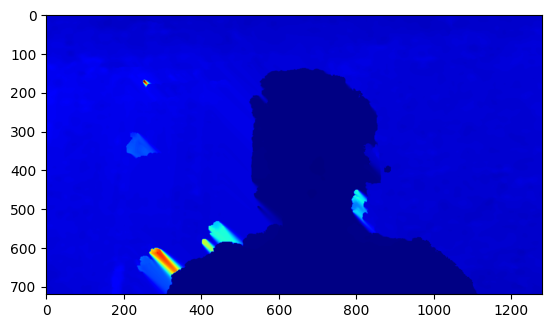

In [351]:
plt.imshow(height_m, cmap='jet')

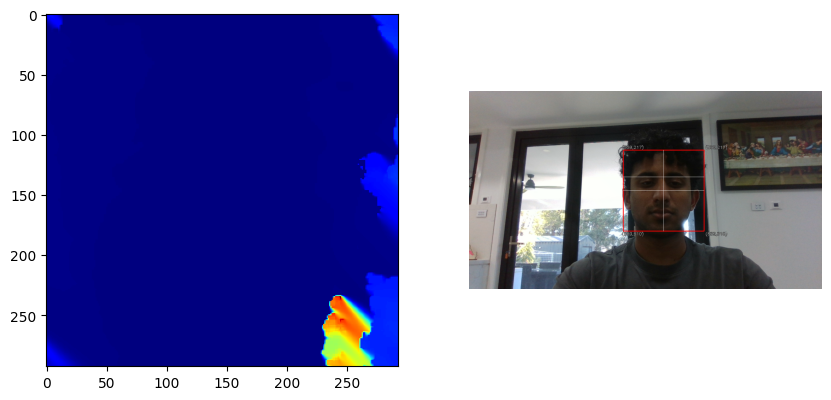

In [352]:
x, y, w, h = faces[0]

# Draw rectangle around face
cv2.rectangle(img2, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Annotate corners with coordinates
tl = f"({x},{y})"
tr = f"({x+w},{y})"
bl = f"({x},{y+h})"
br = f"({x+w},{y+h})"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
thickness = 1
cv2.putText(img2, tl, (x-5, y-5), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, tr, (x+w+5, y-5), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, bl, (x-5, y+h+15), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, br, (x+w+5, y+h+15), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, tl, (x-5, y-5), font, font_scale, (255, 255, 255), thickness)
cv2.putText(img2, tr, (x+w+5, y-5), font, font_scale, (255, 255, 255), thickness)
cv2.putText(img2, bl, (x-5, y+h+15), font, font_scale, (255, 255, 255), thickness)
cv2.putText(img2, br, (x+w+5, y+h+15), font, font_scale, (255, 255, 255), thickness)

# Extract ROI for facial features
roi_gray = gray[y:y+h, x:x+w]
roi_height = height_m[y:y+h, x:x+w]
eyes = eye_cascade.detectMultiScale(roi_gray)
nose = nose_cascade.detectMultiScale(roi_gray)
mouth = mouth_cascade.detectMultiScale(roi_gray)

features = {'face': (x, y, w, h)}

# Draw reference lines
cv2.line(img2, (x + int(w/2), y), (x + int(w/2), y + h), (255, 255, 255), 1)
cv2.line(img2, (x, y + int(h/3)), (x + w, y + int(h/3)), (255, 255, 255), 1)
cv2.line(img2, (x, y + int(h/2)), (x + w, y + int(h/2)), (255, 255, 255), 1)


fig = plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(roi_height, cmap='jet')
plt.subplot(122)
plt.imshow(img2)


# plt.imshow(img2)
plt.axis('off')
plt.show()


a left eye detected
Left eye is in upper 3/5 of face
Left eye detected at: (642, 323)
a right eye detected
Right eye detected at: (743, 321)


/tmp/ipykernel_22572/3186552368.py:59: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  np.cross(planar_vec, perp_eye_axis_vec),   # sine term (determines sign)


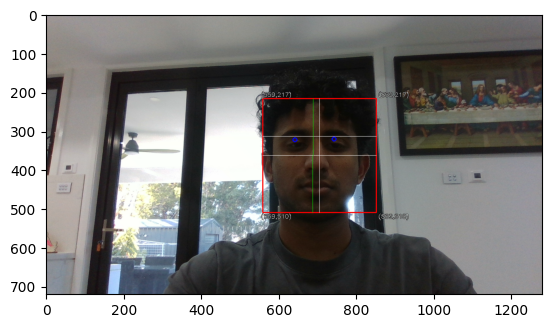

In [353]:
exp = 10

for (ex, ey, ew, eh) in eyes:
    center = (int(x + ex + ew/2), int(y + ey + eh/2))

    if center[0] < x + w/2:
        print("a left eye detected")
        if center[1] < y + 3*h/5:
            print("Left eye is in upper 3/5 of face")
            if 'eye_left' in features:
                print("Multiple left eyes detected, skipping")
                continue

            left_eye_region = img1[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]

            left_eye_height = height_m[y + ey + eh//2, x + ex + ew//2]

            # cv2.rectangle(img2, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (255, 0, 0), 2)

            left_eye_height_map = height_m[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]

            features['eye_left'] = [center[0], center[1], left_eye_height]
            cv2.circle(img2, center, 5, (0, 0, 255), 2)
            print("Left eye detected at:", center)
        
    if center[0] > x + w/2:
        print("a right eye detected")

        if center[1] < y + 3*h/5:
            if 'eye_right' in features:
                print("Multiple right eyes detected, skipping")
                continue
            
            right_eye_region = img1[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]

            right_eye_height = height_m[y + ey + eh//2, x + ex + ew//2]
            
            right_eye_height_map = height_m[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]

            # cv2.rectangle(img2, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (255, 0, 0), 2)
            features['eye_right'] = [center[0], center[1], right_eye_height]
            cv2.circle(img2, center, 5, (0, 0, 255), 2)
            print("Right eye detected at:", center)


left_eye_vec = np.array(features["eye_left"])[:2]
right_eye_vec = np.array(features["eye_right"])[:2]

eye_axis_vec = right_eye_vec - left_eye_vec

perp_eye_axis_vec = np.array([-eye_axis_vec[1], eye_axis_vec[0]])

features["eye_midpoint"] = [(left_eye_vec[0] + right_eye_vec[0]) // 2, (left_eye_vec[1] + right_eye_vec[1]) // 2]

planar_vec = np.array([0, 1])  # reference up direction (y-axis)


theta = np.arctan2(
    np.cross(planar_vec, perp_eye_axis_vec),   # sine term (determines sign)
    np.dot(planar_vec, perp_eye_axis_vec)      # cosine term
)

mid_x_top = int((y + h - features["eye_midpoint"][1]) * np.tan(theta) + features["eye_midpoint"][0])
mid_x_bottom = int((features["eye_midpoint"][1] - y) * np.tan(theta) + features["eye_midpoint"][0])

cv2.line(img2, (mid_x_bottom, y), (mid_x_top, y + h), (0, 255, 0), 1)


x_top = int((y + h - features["eye_left"][1]) * np.tan(theta) + features["eye_left"][0])
x_bottom = int((features["eye_left"][1] - y) * np.tan(theta) + features["eye_left"][0])

# cv2.line(img2, (x_bottom, features["eye_left"][1]), (x_top, y + h), (0, 0, 255), 1)

x_top = int((y + h - features["eye_right"][1]) * np.tan(theta) + features["eye_right"][0])
x_bottom = int((features["eye_right"][1] - y) * np.tan(theta) + features["eye_right"][0])

# cv2.line(img2, (x_bottom, features["eye_right"][1]), (x_top, y + h), (0, 0, 255), 1)



plt.imshow(img2)





In [354]:
# right_eye_region_gray = cv2.equalizeHist(cv2.cvtColor(right_eye_region, cv2.COLOR_RGB2GRAY))
# left_eye_region_gray = cv2.equalizeHist(cv2.cvtColor(left_eye_region, cv2.COLOR_RGB2GRAY))

# # left eye processing
# thresh_left = cv2.threshold(
#     left_eye_region_gray, 0, 255, 
#     cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
# ) 

# # Morphological operations to clean up
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# thresh_left = cv2.morphologyEx(thresh_left, cv2.MORPH_CLOSE, kernel, iterations=2)
# thresh_left = cv2.morphologyEx(thresh_left, cv2.MORPH_OPEN, kernel, iterations=1)

# # left eye processing

# # thresh_right = cv2.adaptiveThreshold(
# #     right_eye_region_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
# #     cv2.THRESH_BINARY_INV, 11, 2
# # )

# thresh_right = cv2.threshold(
#     right_eye_region_gray, 0, 255, 
#     cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
# ) 
# # Morphological operations to clean up
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# thresh_right = cv2.morphologyEx(thresh_right, cv2.MORPH_CLOSE, kernel, iterations=2)
# thresh_right = cv2.morphologyEx(thresh_right, cv2.MORPH_OPEN, kernel, iterations=1)



# plt.subplot(122)
# plt.imshow(thresh_right, cmap='gray')
# plt.subplot(121)
# plt.imshow(thresh_left, cmap='gray')

Tip of Nose detected at: 28 45
Nose detected at: (699, 382)


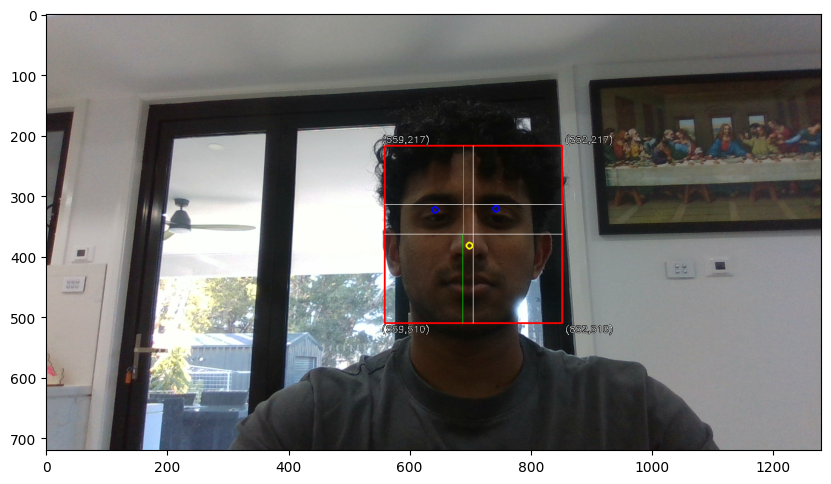

In [355]:
for (nx, ny, nw, nh) in nose:
    nose_center = (int(x + nx + nw/2), int(y + ny + nh/2))
    # Verify nose position relative to eyes
    if ('eye_left' in features and 'eye_right' in features and
        nose_center[1] > features['eye_left'][1] and
        nose_center[1] > features['eye_right'][1] and
        nose_center[0] > features['eye_left'][0] and
        nose_center[0] < features['eye_right'][0]):
        # cv2.rectangle(img2, (x + nx, y + ny), (x + nx + nw, y + ny + nh), (255, 0, 0), 2)
        # cv2.circle(img2, nose_center, 5, (255, 255, 0), 2)
        # print("Nose detected at:", nose_center)
        # features['nose'] = nose_center

        
        # Extract nose height map (correct coordinates)
        nose_height_map = height_m[y + ny:y + ny + nh, x + nx:x + nx + nw]

        expand = 35
        nose_height_map_wide = height_m[y + ny - expand : y + ny + nh + expand, x + nx - expand : x + nx + nw + expand]

        

        # print(nose_height_map[0:10, :])
        min_index = np.argmin(nose_height_map)  # Result: 1 (position of 1)
        row, col = np.unravel_index(min_index, nose_height_map.shape)  # Result: (0, 1)

        print("Tip of Nose detected at:", row, col)

        nose_depth = np.min(nose_height_map)

        nose_center = (int(x + nx + col), int(y + ny + row))
        cv2.circle(img2, nose_center, 5, (255, 255, 0), 2)
        print("Nose detected at:", nose_center)
        features['nose'] = [nose_center[0], nose_center[1], nose_depth]

        fig = plt.figure(figsize=(10, 30))
        # plt.subplot(311)
        # plt.imshow(nose_height_map, cmap='jet')
        # plt.subplot(312)
        # plt.imshow(img2)
        # plt.subplot(313)
        # plt.imshow(nose_height_map_wide, cmap='jet')

        plt.imshow(img2)

    else:
        print("No nose detected or position constraints not met.")


Mouth detected at: (700, 452)
Mouth detected at: (700, 454)
Mouth y higher than nose y, skipping
Mouth y higher than nose y, skipping


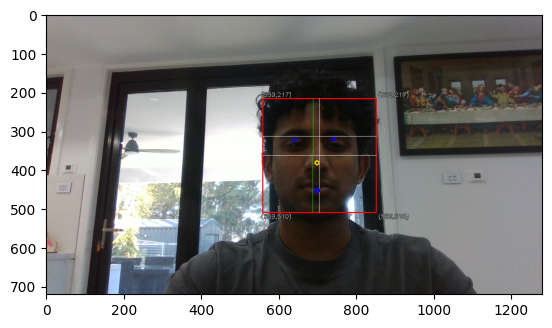

In [356]:
exp = 0

for (mx, my, mw, mh) in mouth:
    mouth_center = (int(x + mx + mw/2), int(y + my + mh/2))
    if mouth_center[1] < features['nose'][1] + 0.1*h:
        print("Mouth y higher than nose y, skipping")
        continue
    
    # mouth_region = img1[y + my - exp : y + my + mh + exp, x + mx - exp: x + mx + mw + exp]
    # mouth_region = img1[y + my + exp : y + my + mh - exp, x + mx - exp: x + mx + mw + exp]
    mouth_region = img1[y + my - exp : y + my + mh + exp, features["eye_left"][0] : features["eye_right"][0] ]


    cv2.circle(img2, mouth_center, 5, (0, 0, 255), 2)
    
    
    features['mouth'] = mouth_center
    print("Mouth detected at:", mouth_center)

    # mouth_region_gray = cv2.cvtColor(mouth_region, cv2.COLOR_RGB2GRAY)

    # mouth_hist = cv2.calcHist([mouth_region_gray], [0], None, [256], [0, 256])

    # mean = np.mean(mouth_hist)
    # stddev = np.std(mouth_hist)
    # min = np.min(mouth_hist)
    # max = np.max(mouth_hist)

    # contrast adjust the image
    # A = min # some stretching parameters
    # B = mean + 1 * stddev
    # C = min
    # D = max
    # mouth_region_gray_adjusted = ((D-C)/(B-A))*(mouth_region_gray-A)+C # apply contrast adjustment
    # mouth_region_gray_adjusted = np.clip(mouth_region_gray_adjusted, 0, 255).astype('uint8') # clip to [0,255] and convert to uint8

    # thresh_val = 220
    # set_val = 255
    # ret, thresh_im1 = cv2.threshold(mouth_region_gray_adjusted, thresh_val, set_val, cv2.THRESH_BINARY)

    # mouth_region_binary_dilate= cv2.dilate(thresh_im1, None, iterations=1)

    # black_mask = mouth_region_binary_dilate == 0

    # rows, cols = np.where(black_mask)

    # min_col_idx = np.argmin(cols)
    # leftmost_row = rows[min_col_idx]
    # leftmost_col = cols[min_col_idx]

    # left_mouth = np.array([int(x + mx + leftmost_col), int(y + my + leftmost_row), height_m[x + mx + leftmost_col, y + my + leftmost_row]])
    # cv2.circle(img2, (int(x + mx + leftmost_col), int(y + my + leftmost_row)), 2, (0, 0, 255), 5)

    # plt.imshow(img2)

    # min_col_idx = np.argmax(cols)
    # rightmost_row = rows[min_col_idx]
    # rightmost_col = cols[min_col_idx]

    # right_mouth = np.array([int(x + mx + rightmost_col), int(y + my + rightmost_row), height_m[x + mx + rightmost_col, y + my + rightmost_row]])

    # cv2.circle(img2, (int(x + mx + rightmost_col), int(y + my + rightmost_row)), 2, (0, 0, 255), 1)

    # plt.imshow(img2)
    # features["right_mouth"] = right_mouth
    # features["left_mouth"] = left_mouth

    # print(left_mouth)
    # print(right_mouth)

    # print(left_mouth[0])
    # print(right_mouth[0])

    # cv2.circle(img2, (int(x + mx + leftmost_col), int(y + my + leftmost_row)), 2, (0, 0, 255), 1)
    # cv2.circle(img2, (int(x + mx + rightmost_col), int(y + my + rightmost_row)), 2, (0, 0, 255), 1)

# plt.subplot(131)
# plt.imshow(mouth_region_gray_adjusted[ :, :int(mouth_region_gray_adjusted.shape[1]/2)], cmap="gray")
# plt.subplot(132)
# plt.imshow(mouth_region_gray_adjusted[:, int(mouth_region_gray_adjusted.shape[1]/2):], cmap="gray")
# plt.subplot(133)
plt.imshow(img2)

In [358]:
# cv2.line(img2, (int(features["eye_left"][0]), int(features["eye_left"][1])), (int(features["right_mouth"][0]), int(features["right_mouth"][1])), (0, 255, 0), 1)
# cv2.line(img2, (int(features["eye_right"][0]), int(features["eye_right"][1])), (int(features["left_mouth"][0]), int(features["left_mouth"][1])), (0, 255, 0), 1)

# cv2.line(img2, (int(features["right_mouth"][0]), int(features["right_mouth"][1])), (int(features["left_mouth"][0]), int(features["left_mouth"][1])), (0, 255, 0), 1)
# cv2.line(img2, (int(features["eye_right"][0]), int(features["eye_right"][1])), (int(features["eye_left"][0]), int(features["eye_left"][1])), (0, 255, 0), 1)

# cv2.line(img2, (int(features["eye_left"][0]), int(features["eye_left"][1])), (int(features["left_mouth"][0]), int(features["left_mouth"][1])), (0, 255, 0), 1)
# cv2.line(img2, (int(features["eye_right"][0]), int(features["eye_right"][1])), (int(features["right_mouth"][0]), int(features["right_mouth"][1])), (0, 255, 0), 1)

# plt.imshow(img2)

In [359]:
left_eye_vec = np.array(features["eye_left"])[:2]
right_eye_vec = np.array(features["eye_right"])[:2]
nose_vec = np.array([features["nose"]])[0][:2]

print(left_eye_vec)
print(right_eye_vec)
print(nose_vec)

print(features["eye_left"])

[642. 323.]
[743. 321.]
[699. 382.]
[642, 323, np.float64(0.562000036239624)]


In [360]:
eye_axis_vec = right_eye_vec - left_eye_vec

inter_eye_distance = np.linalg.norm(eye_axis_vec)
if inter_eye_distance == 0:
    raise ValueError("Left and right eye coordinates are identical.")

print(inter_eye_distance)

101.01980003939822


In [362]:
# print(inter_eye_distance, " - inter eye distance along the axis of the eyes")
# Unit vector along the eye axis
eye_axis_unit = eye_axis_vec / inter_eye_distance

# Vector from left eye to nose
left_to_nose = nose_vec - left_eye_vec

# Scalar projection of nose position onto the eye axis
nose_projection = np.dot(left_to_nose, eye_axis_unit)

# print(nose_projection, " - distance from left eye to nose along the axis of the eyes")
# Normalized position along the axis (-0.5 to +0.5 for centered nose)
normalized_position = nose_projection / inter_eye_distance
# print(normalized_position, " - inter eye distance to nose displacement ratio from left eye")

# Vector from left eye to nose
right_to_nose = nose_vec - right_eye_vec

# Scalar projection of nose position onto the eye axis
nose_projection = np.dot(right_to_nose, eye_axis_unit)

# print(nose_projection, " - distance from the right eye to the nose along the axis of the eyes")
# Normalized position along the axis (-0.5 to +0.5 for centered nose)
normalized_position = nose_projection / inter_eye_distance
# print(normalized_position, " - inter eye distance to nose displacement ratio from right eye")

# Asymmetry ratio (optional alternative metric)
# Maps normalized_position = 0 → 1.0 (symmetric)
# Positive values indicate shift toward right eye
denom_left = 0.5 - normalized_position
denom_right = 0.5 + normalized_position
asymmetry_ratio = (denom_right / denom_left) if denom_left != 0 else float('inf')

# print(asymmetry_ratio, " - asymmetry ratio (right/left)")
print(asymmetry_ratio * 180, " - yaw in degrees (approximate)")
# print(np.degrees(np.arcsin(asymmetry_ratio)), " - yaw in degrees (approximate)")

# roll calculation --------------------------------------------------------------------
planar_vec = np.array([0, 1])  # reference up direction (y-axis)
orth_vec = np.array([-eye_axis_unit[1], eye_axis_unit[0]])  # perpendicular to eye axis

# Normalize both vectors (just to be safe)
planar_vec = planar_vec / np.linalg.norm(planar_vec)
orth_vec = orth_vec / np.linalg.norm(orth_vec)

# Compute signed angle using atan2
roll_rad = np.arctan2(
    np.cross(planar_vec, orth_vec),   # sine term (determines sign)
    np.dot(planar_vec, orth_vec)      # cosine term
)

roll_deg = np.degrees(roll_rad)
print("Head roll (signed):", roll_deg)



9.98810570409061  - yaw in degrees (approximate)
Head roll (signed): -1.134421630977007


/tmp/ipykernel_22572/2239967325.py:48: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  np.cross(planar_vec, orth_vec),   # sine term (determines sign)


In [363]:
nose_axis_unit = np.array([-eye_axis_unit[0], eye_axis_unit[1]])
print(nose_axis_unit, " - nose axis unit vector")



[-0.999804  -0.0197981]  - nose axis unit vector


In [364]:
# print(eye_axis_unit)
# print(type(eye_axis_unit))
# ------------ --------------------------------------
# roll calculation
planar_vec = np.array([0, 1])  # reference up direction (y-axis)
orth_vec = np.array([-eye_axis_unit[1], eye_axis_unit[0]])  # perpendicular to eye axis

# Normalize both vectors (just to be safe)
planar_vec = planar_vec / np.linalg.norm(planar_vec)
orth_vec = orth_vec / np.linalg.norm(orth_vec)

# Compute signed angle using atan2
roll_rad = np.arctan2(
    np.cross(planar_vec, orth_vec),   # sine term (determines sign)
    np.dot(planar_vec, orth_vec)      # cosine term
)

roll_deg = np.degrees(roll_rad)
print("Head roll (signed):", roll_deg)

# ------------ --------------------------------------
# yaw calculation

left_eye_vec = np.array([features["eye_left"][0], features["eye_left"][2]])
right_eye_vec = np.array([features["eye_right"][0], features["eye_right"][2]])


# Vector from left eye to right ear (or right side)
left_to_right_vec = (right_eye_vec - left_eye_vec)
orth_vec = np.array([left_to_right_vec[1], -left_to_right_vec[0]])  # perpendicular to eye axis

# Reference direction: x-axis (to the right)
planar_vec = np.array([1, 0])

# Normalize both vectors
orth_vec = orth_vec / np.linalg.norm(left_to_right_vec)
planar_vec = planar_vec / np.linalg.norm(planar_vec)

# Compute signed yaw using atan2
yaw_rad = np.arctan2(
    np.cross(planar_vec, orth_vec),  # sine term → gives sign (left/right)
    np.dot(planar_vec, orth_vec)     # cosine term
)

yaw_deg = np.degrees(yaw_rad)
print("Head yaw (signed):", yaw_deg)

Head roll (signed): -1.134421630977007
Head yaw (signed): -90.00397101111402


/tmp/ipykernel_22572/2146118064.py:14: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  np.cross(planar_vec, orth_vec),   # sine term (determines sign)
/tmp/ipykernel_22572/2146118064.py:41: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  np.cross(planar_vec, orth_vec),  # sine term → gives sign (left/right)


55cm

30cm -> 30deg

15cm -> 15deg
